<a href="https://colab.research.google.com/github/divyansshu/google-colab/blob/main/PR_Experiment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# load dataset

In [2]:
movie_df = pd.read_csv('/IMDB Dataset.csv')
movie_df.info()
movie_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,0
review,0
sentiment,0


In [9]:
movie_df.shape

(50000, 2)

In [6]:
movie_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
movie_df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


# Sentiment Distribution

In [10]:
movie_df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


Text(0.5, 1.0, 'Distribution of Sentiments')

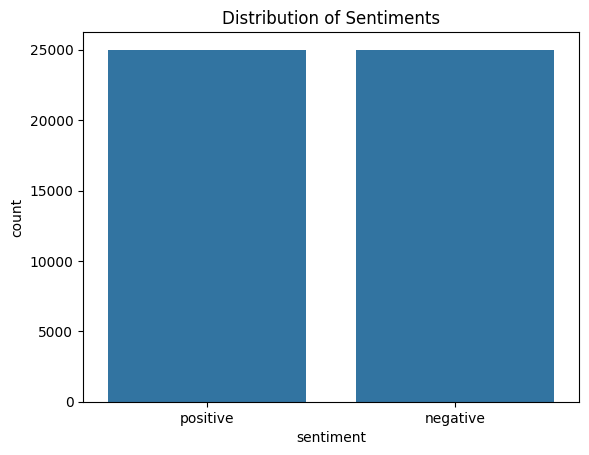

In [12]:
sns.countplot(x='sentiment', data=movie_df)
plt.title('Distribution of Sentiments')


# Review length analysis

In [15]:
movie_df['review_length'] = movie_df['review'].apply(len)
movie_df['review_length'].describe()

,review_length
count,50000.000000
mean,1309.431020
std,989.728014
min,32.000000
25%,699.000000
50%,970.000000
75%,1590.250000
max,13704.000000


In [16]:
print(movie_df['review_length'])

0        1761
1         998
2         926
3         748
4        1317
         ... 
49995    1008
49996     642
49997    1280
49998    1234
49999     678
Name: review_length, Length: 50000, dtype: int64


# Distribution visualization

Text(0.5, 1.0, 'Distribtution of Review lengths')

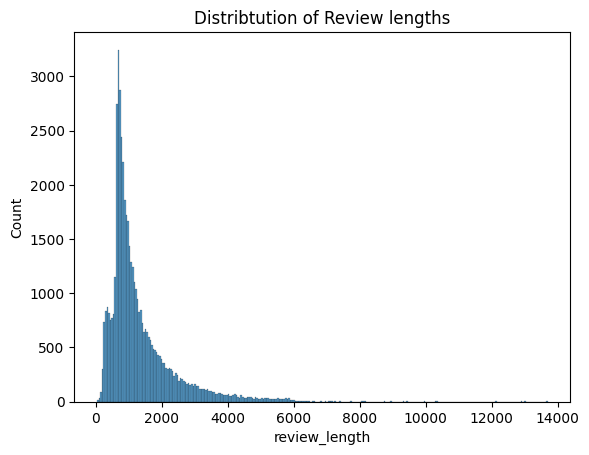

In [14]:
sns.histplot(x='review_length', data=movie_df)
plt.title('Distribtution of Review lengths')

# Data Cleaning

In [25]:
# donwload necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# preprocessing function
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) # remove stop words
  lemmatizer = WordNetLemmatizer()
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()]) # lemmatize
  return text

movie_df['review'] = movie_df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# feature extraction

In [26]:
vectorizer = TfidfVectorizer(max_features=5000)

# fit and transform the reviews

In [27]:
X = vectorizer.fit_transform(movie_df['review'])
y = movie_df['sentiment']

# split into training and testing sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression model

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# predict probabilites and classes

In [30]:
# make predictions
y_pred = model.predict(X_test)

# Evaluate the model

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print('classification report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8873
classification report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)

#calculate TPR, FPR, TNR, FNR
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
TP = conf_matrix[1,1]

TPR = TP / (TP + FN) # sensitivity /recall
FPR = FP / (FP + TN)
TNR = TN / (TN + FP) # specificity
FNR = FN / (TP + FN)

# calculate precision
precision = TP / (TP + FP)

# Print the calculate metrics

In [33]:
print(f'confusion matrix:')
print(conf_matrix)
print(f"TPR/Sensitivity/Recall: {TPR}")
print(f"FPR: {FPR}")
print(f"TNR/Specificity: {TNR}")
print(f"FNR: {FNR}")
print(f"Precision: {precision}")

confusion matrix:
[[4330  631]
 [ 496 4543]]
TPR/Sensitivity/Recall: 0.901567771383211
FPR: 0.12719209836726467
TNR/Specificity: 0.8728079016327354
FNR: 0.09843222861678905
Precision: 0.8780440664862775


# ROC-AUC curve analysis

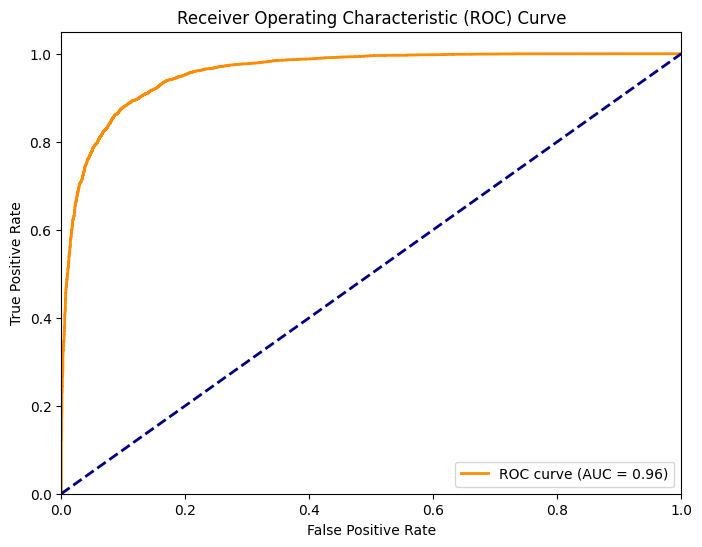

In [34]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='positive')
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()